# Lab 2. Classification

## Setting

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

import seaborn as sns

## Data

In [39]:
df = pd.read_csv('data/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
df.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [41]:
df['Age group'] = ''
df.loc[df['Rings'] < 8, 'Age group'] = 'A'
df.loc[(8 <= df['Rings']) & (df['Rings'] <= 12), 'Age group'] = 'B'
df.loc[df['Rings'] > 12, 'Age group'] = 'C'
df['Age group'] = pd.Categorical(df['Age group'])

We will delete `Rings` feature from the train data later, of course

In [42]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,C
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,A
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,B
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,B
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,A
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,B
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,B
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,B
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,B


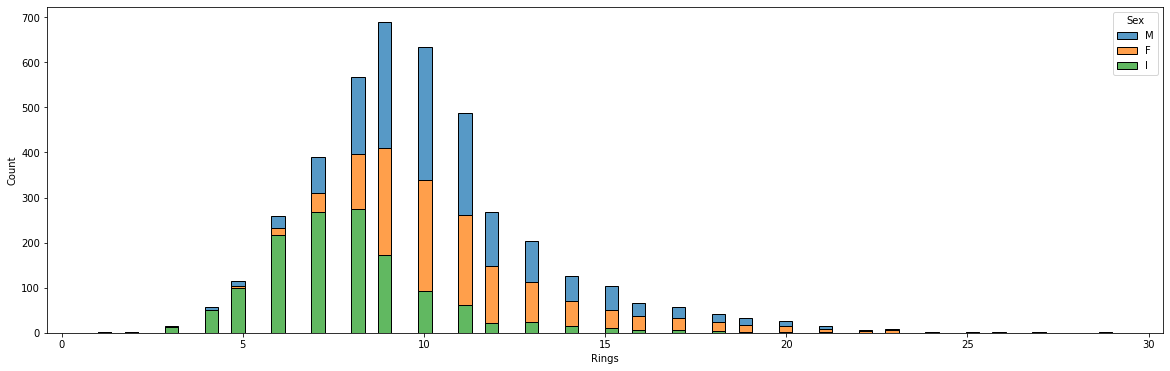

In [43]:
sns.histplot(df, x='Rings', hue='Sex', multiple='stack')
plt.show()

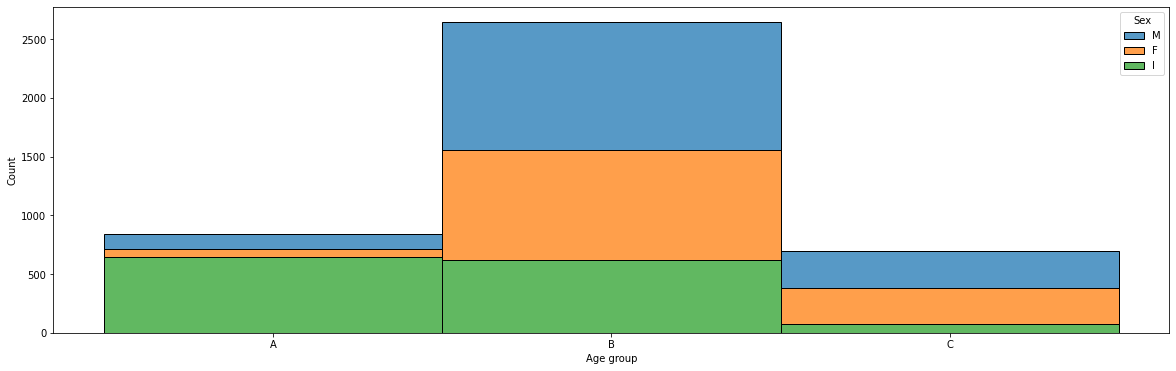

In [44]:
sns.histplot(df, x='Age group', hue='Sex', multiple='stack')
plt.show()

### Encode categorial features

Since `sex` values are not ordered, it's better to use one-hot encoding instead of just convert categorial values to integers

In [45]:
def ohe(data, col):
    vals = set(data[col])
    res = data.copy() 
    for val in vals:
        res.insert(0, column=f"{col}_{val}", value=(res[col]==val).astype(int)) 
    res = res.drop(columns=[col])
    return res

In [46]:
df = ohe(df, 'Sex')

In [47]:
df

,Sex_M,Sex_I,Sex_F,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,C
1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,A
2,0,0,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,B
3,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,B
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,A
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,B
4173,1,0,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,B
4174,1,0,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,B
4175,0,0,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,B


In [48]:
labels = df['Age group']
x = df.drop(columns=['Age group', 'Rings'])

### Encode labels

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
y = le.transform(labels)

### Normilize data

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
x[x.columns] = StandardScaler().fit_transform(x)

In [52]:
x

,Sex_M,Sex_I,Sex_F,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.316677,-0.688018,-0.674834,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.316677,-0.688018,-0.674834,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-0.759488,-0.688018,1.481846,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.316677,-0.688018,-0.674834,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.759488,1.453451,-0.674834,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...,...,...
4172,-0.759488,-0.688018,1.481846,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.316677,-0.688018,-0.674834,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.316677,-0.688018,-0.674834,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-0.759488,-0.688018,1.481846,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


## Classification 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_tr, x_val, y_tr, y_val = train_test_split(x, y, shuffle=True, train_size=0.8)

In [117]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [128]:
models_info = [] 
models = {
    'GaussianNB': GaussianNB(),
    'KNeighboursClassifier(k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNeighboursClassifier(k=10)': KNeighborsClassifier(n_neighbors=10),
    'KNeighboursClassifier(k=20)': KNeighborsClassifier(n_neighbors=20),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM(kernel=linear)': SVC(kernel='linear'),
    'SVM(kernel=poly)': SVC(kernel='poly'),
    'SVM(kernel=rbf, gamma=1/n)': SVC(kernel='rbf'),
    'SVM(kernel=rbf, gamma=0.01)': SVC(kernel='rbf', gamma=0.01),
    'XGBoost': XGBClassifier(),
    'XGBoost(depth<=2)': XGBClassifier(max_depth=2),
    'DecTree': DecisionTreeClassifier(max_depth=2),
}

In [129]:
for name, model in models.items():
    model.fit(x_tr, y_tr)
    y_tr_pred = model.predict(x_tr)
    y_val_pred = model.predict(x_val)
    
    info = {}
    info['model'] = name
    
    info['accuracy train'] = accuracy_score(y_tr, y_tr_pred)
    info['precision train'] = precision_score(y_tr, y_tr_pred, average='micro')
    info['recall train'] = recall_score(y_tr, y_tr_pred, average='micro')
    info['f1_score train'] = f1_score(y_tr, y_tr_pred, average='micro')
    
    info['accuracy val'] = accuracy_score(y_val, y_val_pred)
    info['precision val'] = precision_score(y_val, y_val_pred, average='micro')
    info['recall val'] = recall_score(y_val, y_val_pred, average='micro')
    info['f1_score val'] = f1_score(y_val, y_val_pred, average='micro')
    
    info['model_obj'] = model
    models_info.append(info)

In [130]:
pd.DataFrame(models_info).sort_values('accuracy val', ascending=False)

,model,accuracy train,precision train,recall train,f1_score train,accuracy val,precision val,recall val,f1_score val,model_obj
4,LogisticRegression,0.780006,0.780006,0.780006,0.780006,0.761962,0.761962,0.761962,0.761962,LogisticRegression(max_iter=1000)
10,XGBoost(depth<=2),0.821910,0.821910,0.821910,0.821910,0.761962,0.761962,0.761962,0.761962,"XGBClassifier(base_score=0.5, booster='gbtree'..."
5,SVM(kernel=linear),0.779707,0.779707,0.779707,0.779707,0.758373,0.758373,0.758373,0.758373,SVC(kernel='linear')
2,KNeighboursClassifier(k=10),0.793475,0.793475,0.793475,0.793475,0.754785,0.754785,0.754785,0.754785,KNeighborsClassifier(n_neighbors=10)
7,"SVM(kernel=rbf, gamma=1/n)",0.779108,0.779108,0.779108,0.779108,0.750000,0.750000,0.750000,0.750000,SVC()
1,KNeighboursClassifier(k=5),0.822508,0.822508,0.822508,0.822508,0.742823,0.742823,0.742823,0.742823,KNeighborsClassifier()
3,KNeighboursClassifier(k=20),0.776714,0.776714,0.776714,0.776714,0.741627,0.741627,0.741627,0.741627,KNeighborsClassifier(n_neighbors=20)
9,XGBoost,0.991619,0.991619,0.991619,0.991619,0.741627,0.741627,0.741627,0.741627,"XGBClassifier(base_score=0.5, booster='gbtree'..."
6,SVM(kernel=poly),0.758456,0.758456,0.758456,0.758456,0.733254,0.733254,0.733254,0.733254,SVC(kernel='poly')
8,"SVM(kernel=rbf, gamma=0.01)",0.752469,0.752469,0.752469,0.752469,0.732057,0.732057,0.732057,0.732057,SVC(gamma=0.01)


### Trees representation

In [131]:
import xgboost as xgb
from sklearn import tree

Overfitted tree

<AxesSubplot:>

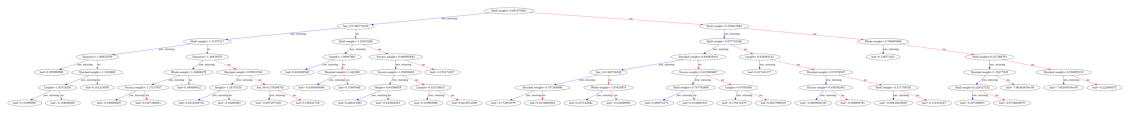

In [134]:
xgb.plot_tree(models_info[9]['model_obj'])

Trees with capped depth

<AxesSubplot:>

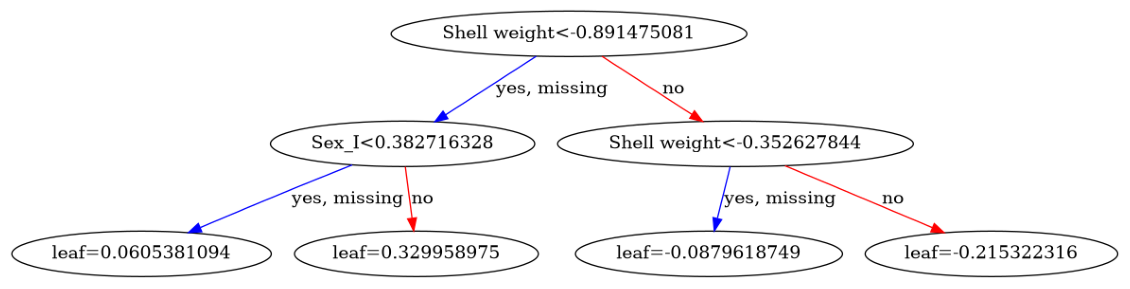

In [132]:
xgb.plot_tree(models_info[10]['model_obj'])

[Text(0.5, 0.8333333333333334, 'X[9] <= -0.891\ngini = 0.532\nsamples = 3341\nvalue = [675, 2114, 552]'),
 Text(0.25, 0.5, 'X[9] <= -1.229\ngini = 0.398\nsamples = 711\nvalue = [520, 184, 7]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.192\nsamples = 364\nvalue = [325, 37, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.505\nsamples = 347\nvalue = [195, 147, 5]'),
 Text(0.75, 0.5, 'X[9] <= 1.083\ngini = 0.415\nsamples = 2630\nvalue = [155, 1930, 545]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.385\nsamples = 2153\nvalue = [154, 1644, 355]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.482\nsamples = 477\nvalue = [1, 286, 190]')]

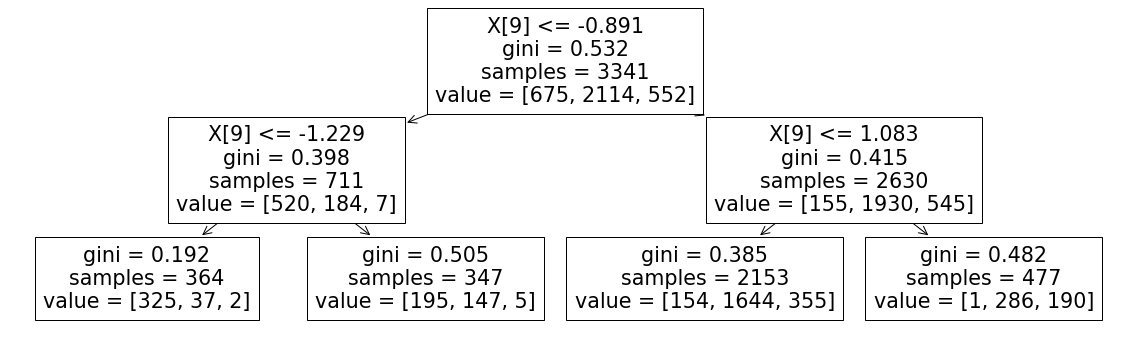

In [133]:
tree.plot_tree(models_info[11]['model_obj'])

## Conclusion

It turned out that on the given dataset simpler models show better performance. Before adding gradient boosting on trees, top models was both linear (in some sense) -- logistic regression and SVM with linear kernel, so it means that in the feature space objects with different labels could be splitted linearly with good accuracy. 

Adding gradient boosting on trees showed obvious signs of overfitting -- 0.99 accuracy on the train set and 0.74 on the validation. So it was decided to add additional constraint to the maximum depth of each tree -- since we already know that objects could be splitted linearly, it looks like a good idea that we don't need complecated decision trees. And with this constraint gradient boosting gave top model with the same validation accuracy as logistic regression and a bit better train accuracy.